In [67]:
import math
import numpy as np

def f1(xin,yin):
    x1 = xin 
    x2 = yin     
    return np.array(x1**2 + 2*x2**2 + 0.3*np.cos(1.0*math.pi*x1)*np.cos(2.0*math.pi*x2))

def f2(xin,yin):
    x1 = xin 
    x2 = yin     
    return np.array(2*x1**2 + 4*x2**2 - 0.3*np.cos(3.0*math.pi*x1+4.0*math.pi*x2) - 0.5)

def f3(xin,yin):   
    x1 = xin 
    x2 = yin     
    return np.array(x1**2 + 2*x2**2 - 0.3*np.cos(1.0*math.pi*x1) - 0.4*np.cos(2.0*math.pi*x2) + 0.7)

def ft(xin,yin):    
    x1 = xin 
    x2 = yin     
    return np.array(0.5*x1**2 + 1.0*x2**2 - 0.3*np.cos(3.0*math.pi*x1+4.0*math.pi*x2) +0.4)



In [68]:
from smt.sampling_methods import LHS
init_points = 50
xlimits = np.array([[-5.0, 5.0], [-5.0, 5.0]])
sampling = LHS(xlimits=xlimits) #, c='ese'
lhs_samples1 = sampling(init_points)
targets1= f1(lhs_samples1[:,0],lhs_samples1[:,1])

In [69]:
#xlimits = np.array([[-5.0, 5.0], [-5.0, 5.0]])
sampling = LHS(xlimits=xlimits) #, c='ese'
lhs_samples2 = sampling(init_points)
targets2= f2(lhs_samples2[:,0],lhs_samples2[:,1])

In [70]:
sampling = LHS(xlimits=xlimits) #, c='ese'
lhs_samples3 = sampling(init_points)
targets3= f3(lhs_samples3[:,0],lhs_samples3[:,1])


In [71]:
configuration1 = {'configurations': lhs_samples1, 'y' :targets1}
configuration2 = {'configurations': lhs_samples2, 'y' :targets2}
configuration3 = {'configurations': lhs_samples3, 'y' :targets3}
training_data = {1:configuration1, 2:configuration2, 3:configuration3}

In [72]:
target_points = 10
sampling = LHS(xlimits=xlimits) #, c='ese'
lhs_samples_target = sampling(target_points)
targets_target= ft(lhs_samples_target[:,0],lhs_samples_target[:,1])


In [73]:
from smt.surrogate_models import KPLS
target_model=KPLS()
X = lhs_samples_target
Y =targets_target # comment this line if running any task other than target task
target_model.set_training_values(X, Y) #using SMT method
target_model.train()

___________________________________________________________________________
   
                                   KPLS
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 10
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.2051585


In [74]:
from tlsm import GPops_dev
gpops =  GPops_dev(training_data=training_data,weight_dilution_strategy = 'None',ignore_target_model = True, bandwidth=0.5, alpha_a=1, alpha_t=1,alpha_s=1, min_accuracy=0.1)
gpops._train(X = lhs_samples_target, Y =targets_target)


c:\Users\b0527730\Anaconda3\envs\bayes1\lib\site-packages\smt\surrogate_models\krg_based.py:968: UserWarning: R is too ill conditioned. Poor combination of regression model and observations.
  warnings.warn(


In [75]:
X_test = [np.random.uniform([-5.0,-5.0], [5.0,5.0]) for _ in range(20)]
error=[0] * len(X_test)
error_t=[0] * len(X_test)
error_gpos=[0] * len(X_test)
error_rgpe = [0] * len(X_test)
error_b1 = [0] * len(X_test)
error_b2 = [0] * len(X_test)
error_b3 = [0] * len(X_test)
error_b1o = [0] * len(X_test)
error_b2o = [0] * len(X_test)
error_b3o = [0] * len(X_test)
for i,x in enumerate(X_test):
    xn = np.atleast_2d(x)
    est_gpos = gpops._predict(xn)[0]
    est_b1 = gpops.coefs_[0,0]*gpops.base_models[0].predict_values(xn)[:,0] + gpops.coefs_[0,1]
    error_b1[i] = abs(ft(x[0],x[1]) - est_b1 )/abs(ft(x[0],x[1]))
    est_b2 = gpops.coefs_[1,0]*gpops.base_models[1].predict_values(xn)[:,0] + gpops.coefs_[1,1]
    error_b2[i] = abs(ft(x[0],x[1]) - est_b2 )/abs(ft(x[0],x[1]))
    est_b3 = gpops.coefs_[2,0]*gpops.base_models[2].predict_values(xn)[:,0] + gpops.coefs_[2,1]
    error_b3[i] = abs(ft(x[0],x[1]) - est_b3 )/abs(ft(x[0],x[1]))
    est_b1o = gpops.base_models[0].predict_values(xn)[:,0] 
    error_b1o[i] = abs(ft(x[0],x[1]) - est_b1o )/abs(ft(x[0],x[1]))
    est_b2o = gpops.base_models[1].predict_values(xn)[:,0] 
    error_b2o[i] = abs(ft(x[0],x[1]) - est_b2o )/abs(ft(x[0],x[1]))
    est_b3o = gpops.base_models[2].predict_values(xn)[:,0] 
    error_b3o[i] = abs(ft(x[0],x[1]) - est_b3o )/abs(ft(x[0],x[1]))
    error_t[i] = abs(ft(x[0],x[1]) - target_model._predict_values(xn))/abs(ft(x[0],x[1]))
    error_gpos[i] = abs(ft(x[0],x[1]) - est_gpos[0])/abs(ft(x[0],x[1]))


20


Text(0, 0.5, '% Prediction Error')

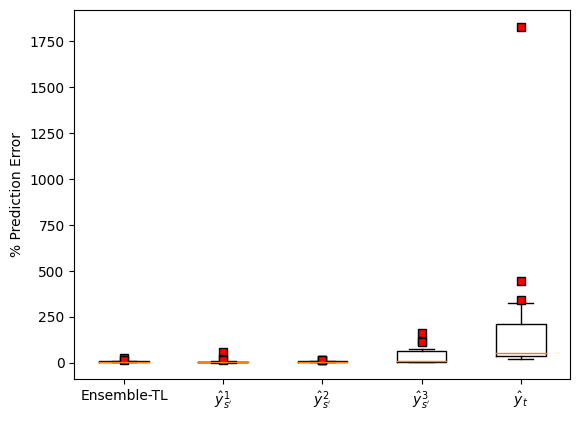

In [76]:
import matplotlib.pyplot as plt
red_square = dict(markerfacecolor='r', marker='s')
fig = plt.figure()
ax = plt.axes()
print(len(np.array(error_b1)*100))
errors = np.vstack([ np.array(error_gpos)*100, np.concatenate(error_b1).ravel()*100, np.concatenate(error_b2).ravel()*100, np.concatenate(error_b3).ravel()*100,np.concatenate(error_t).ravel()*100])
errors = errors.T
#ax.boxplot(errors,flierprops=red_square, vert=True, whis=0.75, labels =[ 'Ensemble-TL','$\^y_{s\'}^1$','$\^y_{s\'}^2$','$\^y_{s\'}^3$','$\^y_{t}$'] ) #, labels=box_dict.keys()
ax.boxplot(errors,flierprops=red_square, vert=True, whis=0.75, labels =[ 'Ensemble-TL','$\^y_{s\'}^1$','$\^y_{s\'}^2$','$\^y_{s\'}^3$','$\^y_{t}$'] ) #, labels=box_dict.keys()

ax.set_ylabel('% Prediction Error') 


Text(0, 0.5, '% Prediction Error')

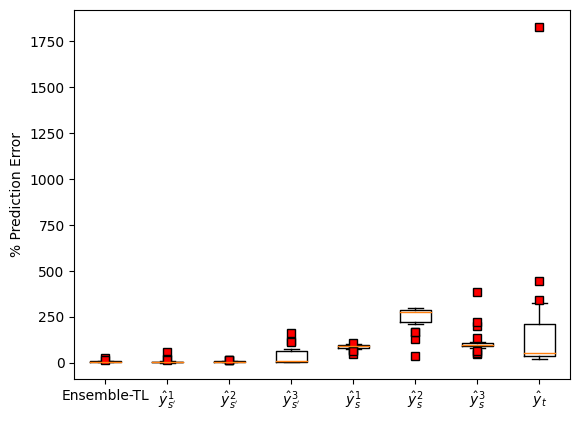

In [77]:
import matplotlib.pyplot as plt
red_square = dict(markerfacecolor='r', marker='s')
fig = plt.figure()
ax = plt.axes()

errors = np.vstack([ np.array(error_gpos)*100, np.concatenate(error_b1).ravel()*100, np.concatenate(error_b2).ravel()*100, np.concatenate(error_b3).ravel()*100, np.concatenate(error_b1o).ravel()*100, np.concatenate(error_b2o).ravel()*100, np.concatenate(error_b3o).ravel()*100,np.concatenate(error_t).ravel()*100])
errors = errors.T
ax.boxplot(errors,flierprops=red_square, vert=True, whis=0.75, labels =[ 'Ensemble-TL','$\^y_{s\'}^1$','$\^y_{s\'}^2$','$\^y_{s\'}^3$','$\^y_s^{1}$','$\^y_s^{2}$','$\^y_s^{3}$','$\^y_{t}$'] ) #, labels=box_dict.keys()
ax.set_ylabel('% Prediction Error') 
